In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import json
import matplotlib.pyplot as plt
import datetime
from datetime import time

In [2]:
pwd

'C:\\Users\\james\\Desktop'

In [3]:
cd SpringboardWork\ultimate_challenge

C:\Users\james\Desktop\SpringboardWork\ultimate_challenge


In [4]:
# open and examine file
with open("logins.json") as datafile:
    data = json.load(datafile)
    df = pd.DataFrame(data)

In [5]:
df.head(10)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
5,1970-01-01 20:21:41
6,1970-01-01 20:12:16
7,1970-01-01 20:35:47
8,1970-01-01 20:35:38
9,1970-01-01 20:47:52


In [6]:
df.tail(10)

,login_time
93132,1970-04-13 18:36:53
93133,1970-04-13 18:40:31
93134,1970-04-13 18:46:06
93135,1970-04-13 18:40:40
93136,1970-04-13 18:48:52
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


In [7]:
# check for NaNs
df.isna().sum()

login_time    0
dtype: int64

In [8]:
# see if login time is a date time object, which it is not
df.dtypes

login_time    object
dtype: object

In [9]:
# convert to datetime object
df.login_time = pd.to_datetime(df.login_time)

In [10]:
# describe data - it is interesting that there are some duplicates
# it is important to note that the first and last days of the series do not appear to be complete
df.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [11]:
#examine the duplicates by creating counting the number of instances of a given login_time, sorted by highest frequency
#I think duplicates not likely an error but just that multiple people are logging in at the same time
# to know for sure I would have to learn more about the source of the data
df['tot'] = 1
df
dupv = df.pivot_table(values='tot', index='login_time', aggfunc ='sum')
dupv = dupv.sort_values('tot', ascending=False)
dupv.head(15)

,tot
login_time,
1970-01-06 21:45:52,3
1970-01-09 01:31:25,3
1970-04-12 04:03:15,3
1970-02-12 11:16:53,3
1970-04-04 01:17:40,3
1970-03-29 03:24:57,3
1970-03-14 17:45:52,3
1970-02-24 23:09:57,3
1970-03-17 01:01:39,3


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
 1   tot         93142 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.4 MB


In [13]:
# add new columns for grouping and aggregating
df['Month'] = df.login_time.dt.month
df['Weekday'] = df.login_time.dt.strftime("%A")
df['day_of_week'] = df.login_time.dt.weekday
df['Day'] = df.login_time.dt.day
df['Hour'] = df.login_time.dt.hour
df['Minute'] = df.login_time.dt.minute
df['login_date'] = df.login_time.dt.strftime("%m/%d/%y")
df

,login_time,tot,Month,Weekday,day_of_week,Day,Hour,Minute,login_date
0,1970-01-01 20:13:18,1,1,Thursday,3,1,20,13,01/01/70
1,1970-01-01 20:16:10,1,1,Thursday,3,1,20,16,01/01/70
2,1970-01-01 20:16:37,1,1,Thursday,3,1,20,16,01/01/70
3,1970-01-01 20:16:36,1,1,Thursday,3,1,20,16,01/01/70
4,1970-01-01 20:26:21,1,1,Thursday,3,1,20,26,01/01/70
...,...,...,...,...,...,...,...,...,...
93137,1970-04-13 18:50:19,1,4,Monday,0,13,18,50,04/13/70
93138,1970-04-13 18:43:56,1,4,Monday,0,13,18,43,04/13/70
93139,1970-04-13 18:54:02,1,4,Monday,0,13,18,54,04/13/70
93140,1970-04-13 18:57:38,1,4,Monday,0,13,18,57,04/13/70


In [14]:
# create function to convert hours and minutes into 15 minute intervals
def cvh15(hour, minute):
    if minute >= 45:
        m = 45
    elif minute >=30:
        m = 30
    elif minute >=15:
        m = 15
    else:
        m = 0
    return datetime.time(hour, m, 0)

    

In [15]:
# create column with hours and minutes
df['hour_15'] = df[['Hour','Minute']].apply(lambda x: cvh15(*x), axis=1)

In [16]:
# check out the df to make sure the hour_15 is working as expected by 15 min interval
df

,login_time,tot,Month,Weekday,day_of_week,Day,Hour,Minute,login_date,hour_15
0,1970-01-01 20:13:18,1,1,Thursday,3,1,20,13,01/01/70,20:00:00
1,1970-01-01 20:16:10,1,1,Thursday,3,1,20,16,01/01/70,20:15:00
2,1970-01-01 20:16:37,1,1,Thursday,3,1,20,16,01/01/70,20:15:00
3,1970-01-01 20:16:36,1,1,Thursday,3,1,20,16,01/01/70,20:15:00
4,1970-01-01 20:26:21,1,1,Thursday,3,1,20,26,01/01/70,20:15:00
...,...,...,...,...,...,...,...,...,...,...
93137,1970-04-13 18:50:19,1,4,Monday,0,13,18,50,04/13/70,18:45:00
93138,1970-04-13 18:43:56,1,4,Monday,0,13,18,43,04/13/70,18:30:00
93139,1970-04-13 18:54:02,1,4,Monday,0,13,18,54,04/13/70,18:45:00
93140,1970-04-13 18:57:38,1,4,Monday,0,13,18,57,04/13/70,18:45:00


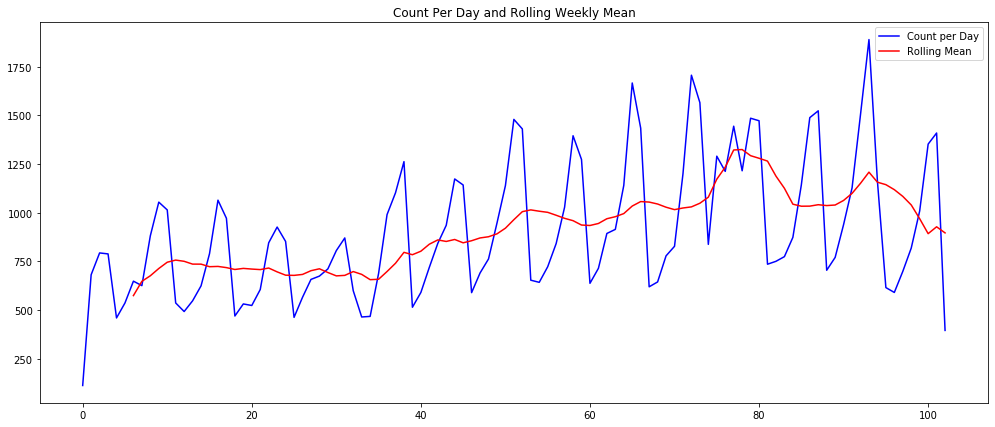

In [17]:
# count logins by and then plot to get a sense of data over time with a rolling, 7 day mean
lp = df.pivot_table(values ='login_time', index=['login_date', 'day_of_week','Weekday'], aggfunc ='count')
lpr = lp.reset_index()
rolmean = lpr['login_time'].rolling(7).mean()
fig = plt.figure(figsize=(17, 7))
orig = plt.plot(lpr['login_time'], color='blue',label='Count per Day')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Count Per Day and Rolling Weekly Mean')
plt.show()


In [18]:
lp = lp.reset_index()


In [19]:
df.dtypes

login_time     datetime64[ns]
tot                     int64
Month                   int64
Weekday                object
day_of_week             int64
Day                     int64
Hour                    int64
Minute                  int64
login_date             object
hour_15                object
dtype: object

In [20]:
#clearly there is a cycle to this data - I will see if it is weekly by aggregating on weekday and then taking the average number per weekday
wp = df.pivot_table(values='login_time', index=['login_date','Weekday'], aggfunc='count')
wp.groupby('Weekday').mean()

,login_time
Weekday,
Friday,1013.866667
Monday,588.200000
Saturday,1291.800000
Sunday,1211.133333
Thursday,797.333333
Tuesday,662.000000
Wednesday,738.500000


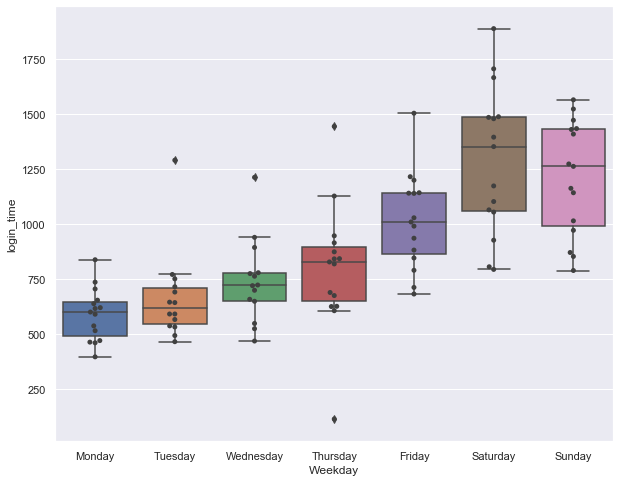

In [21]:
# make a boxplot by Day of Week
bd = wp.reset_index()
bd
sns.set(rc={'figure.figsize':(10,8)})
ax = sns.boxplot(x='Weekday', y ='login_time', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], data=bd)
ax = sns.swarmplot(x='Weekday', y ='login_time', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], data=bd, color=".25")

In [22]:
# examine the high outliers on Tuesday, Wednesday and Thursday
#they appear to be the week of St. Patrick's day perhaps causing a spike in activity
lp[lp['day_of_week']>=1][lp['day_of_week']<4][lp['login_time']>1100].sort_values(by='login_time', ascending=False)

C:\Users\james\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,login_date,day_of_week,Weekday,login_time
77,03/19/70,3,Thursday,1444
75,03/17/70,1,Tuesday,1290
76,03/18/70,2,Wednesday,1212
91,04/02/70,3,Thursday,1127


In [23]:
# examine low outliers, which turns out to be the first day of the series where counts started late in the day
lp[lp['day_of_week']>=1][lp['day_of_week']<4][lp['login_time']<250].sort_values(by='login_time')

C:\Users\james\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,login_date,day_of_week,Weekday,login_time
0,01/01/70,3,Thursday,112


In [24]:
# create a pivot table to see count of logins per weekday and 15 minute interval
h15 = df.pivot_table(values='login_time', index=['day_of_week', 'Weekday','hour_15'], aggfunc ='count')
h15.head()

login_time
day_of_week Weekday hour_15             
0           Monday  00:00:00         126
                    00:15:00         140
                    00:30:00         144
                    00:45:00         121
                    01:00:00         109

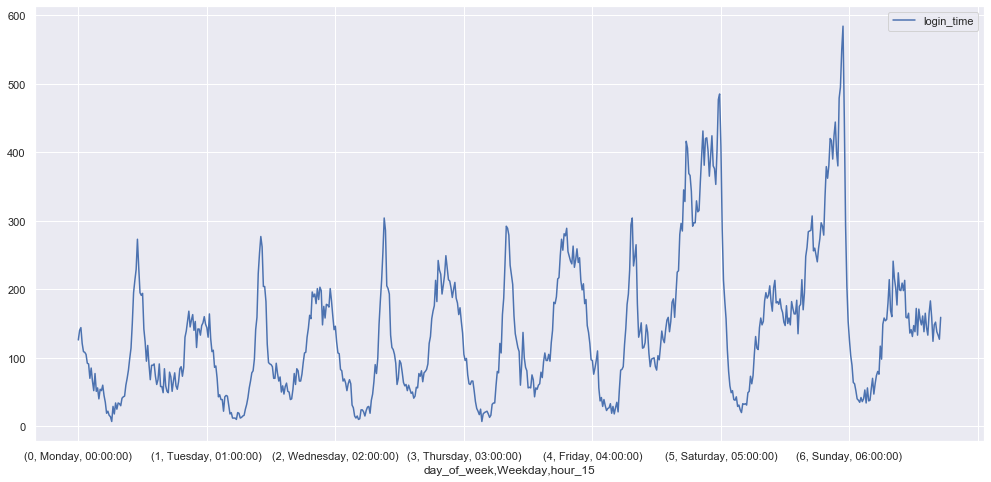

In [25]:
# examine the daily counts per time of day 
h15.plot(figsize=(17, 8))

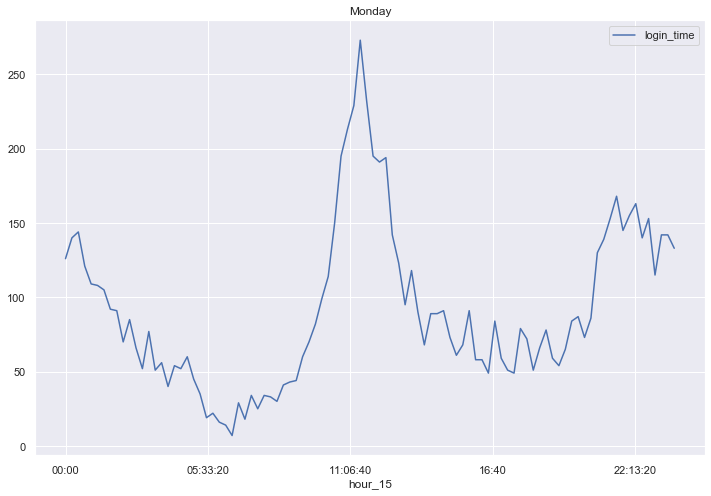

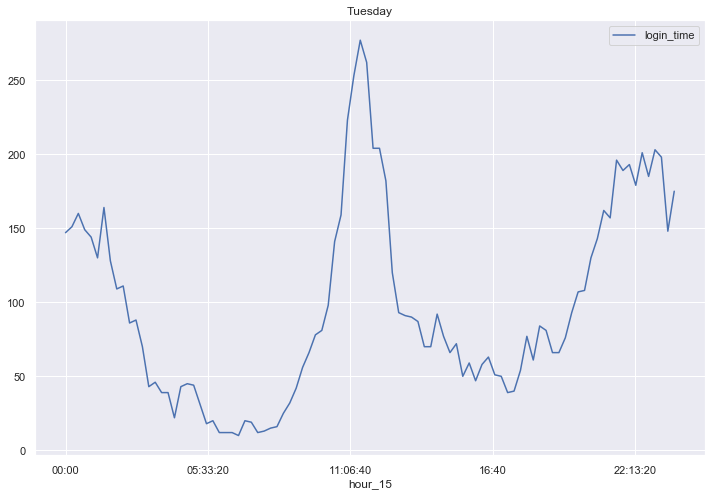

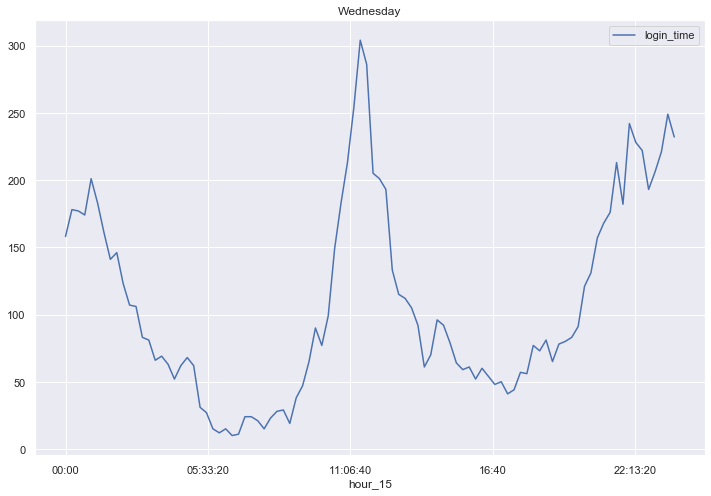

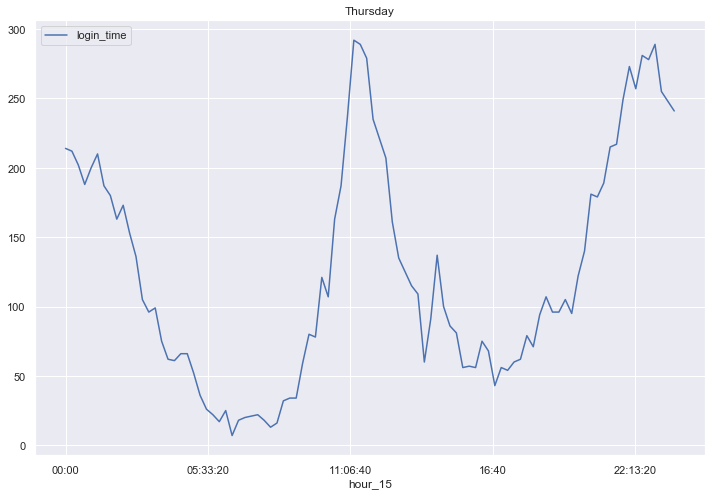

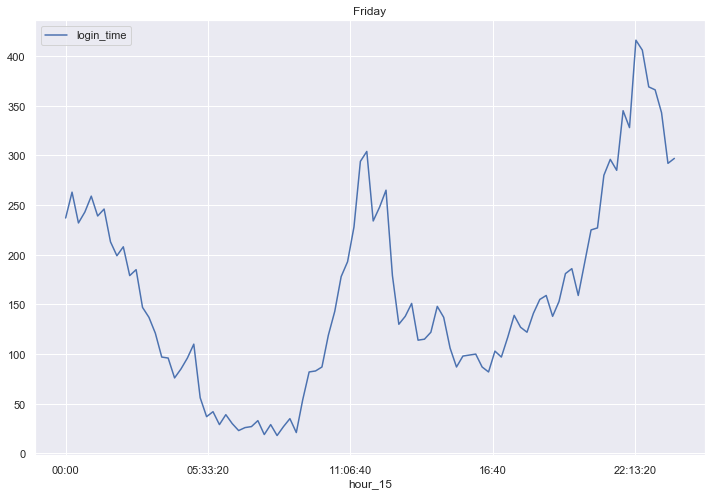

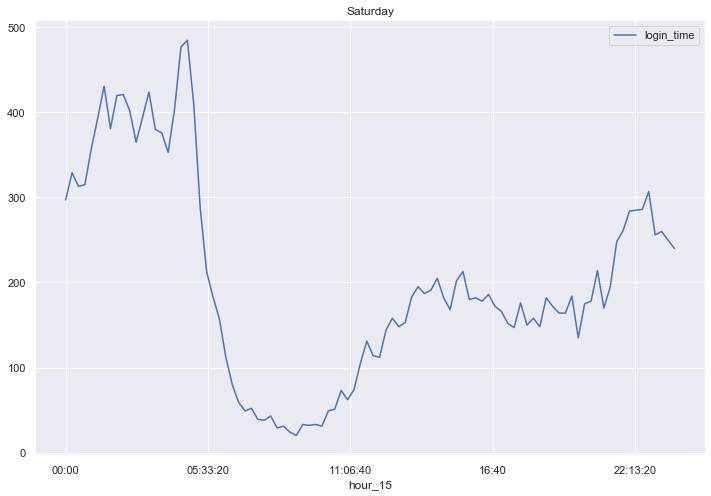

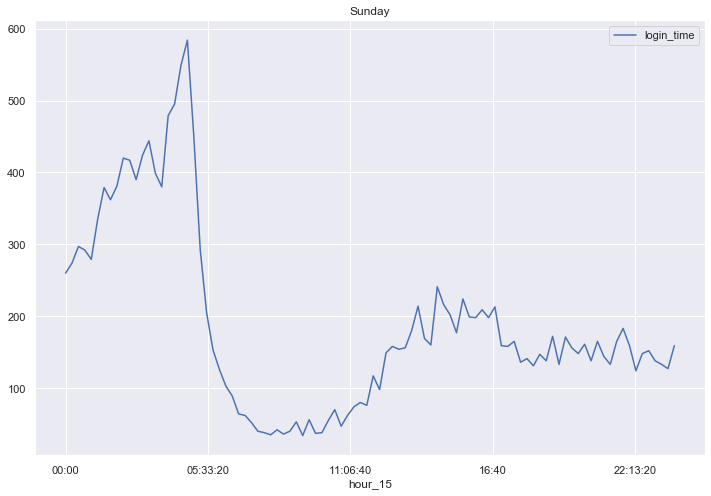

In [26]:
# plot patterns by day in closer detail
for i in ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']:
    piv = df[df['Weekday']==i].pivot_table(values='login_time', index='hour_15', aggfunc = 'count')
    piv.plot(figsize=(12,8), title=i)

In [27]:
h15 = h15.reset_index()

In [28]:
# calculate the time per day with the max and min counts
d = {}
for i in ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']:
    x, y = h15.hour_15[h15['Weekday']==i][h15['login_time'] == h15['login_time'][h15['Weekday']==i].max()].values, h15.hour_15[h15['Weekday']==i][h15['login_time'] == h15['login_time'][h15['Weekday']==i].min()].values
    d[i] = (x, y)
d
ddf = pd.DataFrame(d)
tddf = ddf.T
tddf.columns = ['Max','Min']
tddf

,Max,Min
Monday,[11:30:00],[06:30:00]
Tuesday,[11:30:00],[06:45:00]
Wednesday,[11:30:00],[06:30:00]
Thursday,[11:15:00],[06:30:00]
Friday,[22:15:00],[08:15:00]
Saturday,[04:45:00],[09:00:00]
Sunday,[04:45:00],[09:15:00]


In [29]:
#I wanted to see if New Year's Day traffic was really lower than other Thursdays, by only comparing those days after 8 pm
# It seems like holidays have an impact on this data but different holidays have different impacts based on how people celebrate
df[df['Weekday'] == 'Thursday'][df['hour_15'] > datetime.time(20, 0, 0)].pivot_table(values='login_time', index='login_date', aggfunc='count')

C:\Users\james\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,login_time
login_date,
01/01/70,110
01/08/70,199
01/15/70,189
01/22/70,183
01/29/70,184
02/05/70,188
02/12/70,276
02/19/70,279
02/26/70,254
